In [1]:
import torch

In [2]:
x = torch.ones(2, 2, requires_grad=True)

In [3]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [4]:
print(x.grad_fn)

None


In [5]:
y = x + 2

In [6]:
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [7]:
z = y * y * 3

In [8]:
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


In [9]:
out = z.mean()

In [10]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [11]:
out.backward()

In [12]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [13]:
print(z.grad)

None


<ipython-input-13-c4ef32dfae4c>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  print(z.grad)


In [15]:
out2 = x.sum()

In [16]:
out2.backward()

In [17]:
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])


In [18]:
out3 = x.sum()

In [19]:
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [20]:
out3.backward()

In [21]:
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


In [22]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)

In [23]:
y = 2 * x

In [24]:
print(y)

tensor([2., 4., 6., 8.], grad_fn=<MulBackward0>)


In [25]:
z = y.view(2, 2)

In [26]:
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)


In [27]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)

In [28]:
z.backward(v)

In [29]:
print(x.grad)

tensor([2.0000, 0.2000, 0.0200, 0.0020])


In [30]:
print(x)

tensor([1., 2., 3., 4.], requires_grad=True)


In [31]:
x = torch.tensor(1.0, requires_grad=True)

In [32]:
y1 = x ** 2

In [33]:
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

In [34]:
print(x)
print(y1)

tensor(1., requires_grad=True)
tensor(1., grad_fn=<PowBackward0>)


In [35]:
print(x.requires_grad)

True


In [36]:
y3.backward()

In [37]:
print(x.grad)

tensor(2.)


In [38]:
y2.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [39]:
x = torch.ones(1, requires_grad=True)

In [40]:
print(x.data)

tensor([1.])


In [41]:
print(x)

tensor([1.], requires_grad=True)


In [42]:
print(x.data.requires_grad)

False


In [43]:
print(x.requires_grad)

True


In [44]:
y = 2 * x

In [45]:
x.data *= 100

In [46]:
y.backward()

In [47]:
print(x)

tensor([100.], requires_grad=True)


In [48]:
print(x.grad)

tensor([2.])


In [49]:
%matplotlib inline

In [50]:
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [54]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

In [55]:
print(features[0], labels[0])

tensor([0.6101, 0.5784]) tensor(3.4503)


In [56]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [57]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

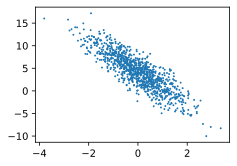

In [63]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [64]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [65]:
batch_size = 10

In [66]:
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-1.8224,  0.7205],
        [ 0.0697, -0.8300],
        [ 1.3504, -1.9205],
        [ 1.1830,  0.3836],
        [-0.1933,  0.0337],
        [ 0.3301, -0.4251],
        [ 0.9422,  1.3412],
        [ 0.1146,  0.7808],
        [-0.9510,  0.0756],
        [ 1.0355, -1.0743]]) tensor([-1.9034,  7.1630, 13.4455,  5.2589,  3.6783,  6.2921,  1.5342,  1.7828,
         2.0354,  9.9050])


In [67]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)

In [70]:
b = torch.zeros(1, dtype=torch.float32)

In [71]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [73]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [74]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [75]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [76]:
help(y.view)

Help on built-in function view:

view(...) method of torch.Tensor instance
    view(*shape) -> Tensor
    
    Returns a new tensor with the same data as the :attr:`self` tensor but of a
    different :attr:`shape`.
    
    The returned tensor shares the same data and must have the same number
    of elements, but may have a different size. For a tensor to be viewed, the new
    view size must be compatible with its original size and stride, i.e., each new
    view dimension must either be a subspace of an original dimension, or only span
    across original dimensions :math:`d, d+1, \dots, d+k` that satisfy the following
    contiguity-like condition that :math:`\forall i = d, \dots, d+k-1`,
    
    .. math::
    
      \text{stride}[i] = \text{stride}[i+1] \times \text{size}[i+1]
    
    Otherwise, it will not be possible to view :attr:`self` tensor as :attr:`shape`
    without copying it (e.g., via :meth:`contiguous`). When it is unclear whether a
    :meth:`view` can be performe

In [78]:
import torch.nn as nn

In [84]:
import re
illegal_char_re = re.compile(r"(?: ^)('|\.|\$|-|\s)(?: |$)")

In [85]:
import torch
from torch import nn

In [88]:
class MLP(nn.Module):
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.hidden == nn.Linear(784, 256)
        self.act = nn.ReLU()
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        a = self.act(self.hidden(x))
        return self.output(a)